In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/facebook-live-sellers-in-thailand-uci-ml-repo/Live.csv


In [2]:
df = pd.read_csv('/kaggle/input/facebook-live-sellers-in-thailand-uci-ml-repo/Live.csv')

In [3]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [4]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [5]:
df.shape

(7050, 16)

In [8]:
df.drop(['Column1','Column2','Column3','Column4'],axis=1,inplace=True)

In [9]:
df['status_type'].value_counts()

photo     4288
video     2334
status     365
link        63
Name: status_type, dtype: int64

In [11]:
df['status_id'].nunique()

6997

In [12]:
df['status_published'].nunique()

6913

In [13]:
df.shape

(7050, 12)

#### Both status_id and status_published have lots of unique values, so we drop them.

In [14]:
df.drop(['status_id','status_published'],axis=1,inplace=True)

In [16]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [17]:
X = df

### Convert categorical variable into integers

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
X['status_type'] = le.fit_transform(X['status_type'])

#### Feature Scaling

In [23]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

In [24]:
X = ms.fit_transform(X)

In [27]:
X_columns = df.columns

In [28]:
X = pd.DataFrame(X,columns=[X_columns])

In [54]:
X.head(2)

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.14003,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.00000,0.000000,0.000000,0.000000,0.0


### Elbow method to find the optimal number of clusters

In [30]:
from sklearn.cluster import KMeans

In [37]:
k_values = range(1,11)
sse = [] 

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

In [40]:
import matplotlib.pyplot as plt

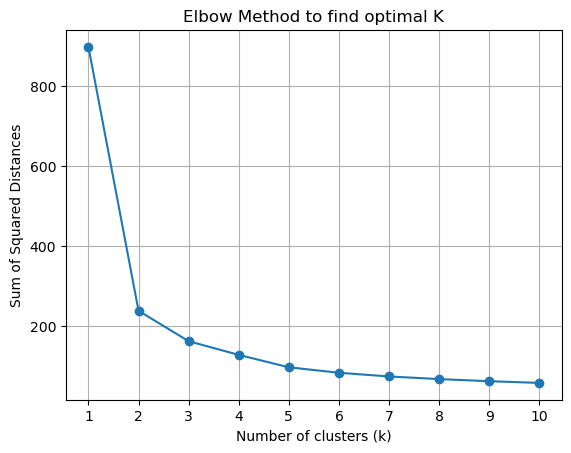

In [42]:
plt.plot(k_values,sse,marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method to find optimal K')
plt.xticks(k_values)
plt.grid(True)
plt.show()


### K-Mean Cluster

In [58]:
kmeans = KMeans(n_clusters = 4, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=42)

#### accuracy

In [59]:
y=df['status_type']

In [60]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [61]:
correct_labels = sum(y==labels)

In [62]:
print("Results: %d out of total %d were correct." %(correct_labels,y.size))


Results: 2266 out of total 7050 were correct.
